# CognoRise InfoTech Internship

### Task-2:  80 Cereals

#### ABOUT THE DATASET

Fields in the dataset:

Name: Name of cereal

mfr: Manufacturer of cereal

A = American Home Products

G = General Mills

K = Kelloggs

N = Nabisco

P = Post

Q = Quaker Oats

R = Ralston Purina

type: cold,hot

calories: calories per serving

protein: grams of protein

fat: grams of fat

sodium: milligrams of sodium

fiber: grams of dietary fiber

carbo: grams of complex carbohydrates

sugars: grams of sugars

potass: milligrams of potassium

vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended

shelf: display shelf (1, 2, or 3, counting from the floor)

weight: weight in ounces of one serving

cups: number of cups in one serving

rating: a rating of the cereals (Possibly from Consumer Reports?)

##### Acknowledgements
These datasets have been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. The original source can be found here

##### Original Dataset: 
https://www.kaggle.com/datasets/crawford/80-cereals

### Load the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("cereal.csv")

In [4]:
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [5]:
cereals = df.copy()

### Explore the basic information

In [7]:
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [8]:
cereals.shape

(77, 16)

In [9]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [10]:
# check for missing values
cereals.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

### Exploratory data analysis

##### Explore Categorical variables

In [13]:
# Explore the distribution of 'mfr' (Manufacturer)
print(cereals['mfr'].value_counts())

# Explore the distribution of 'type' (Cold or Hot)
print(cereals['type'].value_counts())


K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64
C    74
H     3
Name: type, dtype: int64


#### Visualize Numerical variables

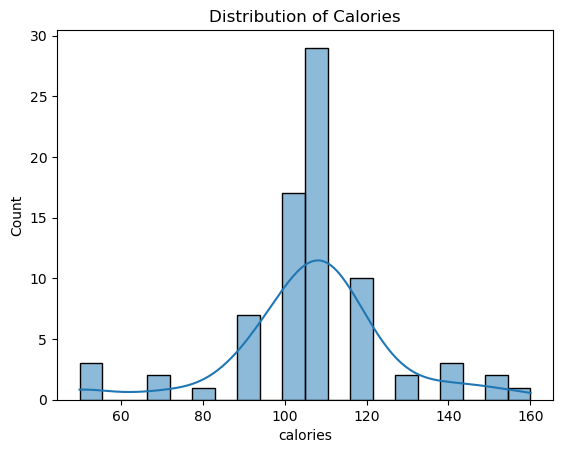

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of calories
sns.histplot(df['calories'], bins=20, kde=True)
plt.title('Distribution of Calories')
plt.show()



#### Correlation

C:\Users\asus\AppData\Local\Temp\ipykernel_19908\3457783933.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


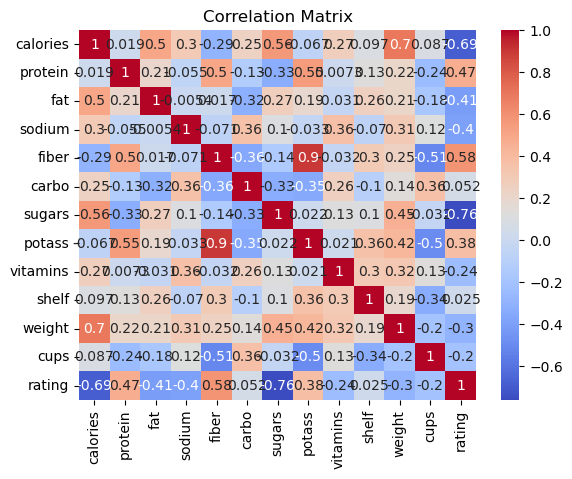

In [18]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Explore Relationships

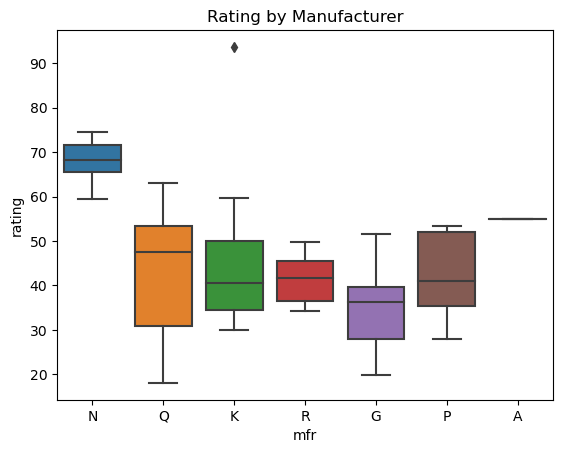

In [19]:
# Boxplot of ratings for each manufacturer
sns.boxplot(x='mfr', y='rating', data=df)
plt.title('Rating by Manufacturer')
plt.show()


### Insights

#### TOP MANUFACTURER

In [21]:
# Calculate average ratings for each manufacturer
avg_ratings_by_manufacturer = df.groupby('mfr')['rating'].mean().sort_values(ascending=False)

# Display the top manufacturers
print(avg_ratings_by_manufacturer)


mfr
N    67.968567
A    54.850917
K    44.038462
Q    42.915990
P    41.705744
R    41.542997
G    34.485852
Name: rating, dtype: float64


#### NUTRITIONAL ANALYSIS

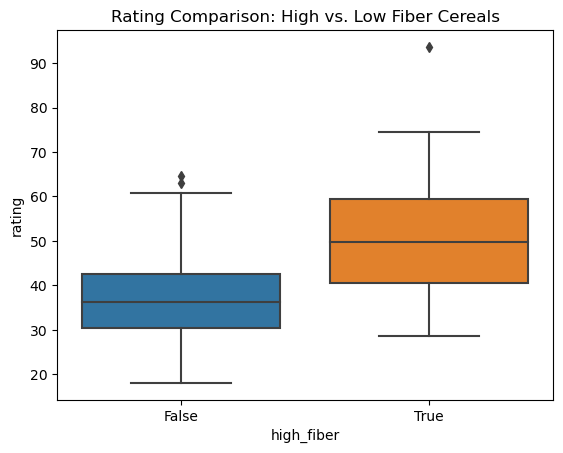

In [22]:
# Compare average ratings for high vs. low fiber cereals
df['high_fiber'] = df['fiber'] > df['fiber'].median()
sns.boxplot(x='high_fiber', y='rating', data=df)
plt.title('Rating Comparison: High vs. Low Fiber Cereals')
plt.show()


In [29]:
# Compare average ratings for high vs. low fiber cereals
df['high_fiber'] = df['fiber'] > df['fiber'].median()
avg_rating_high_fiber = df.loc[df['high_fiber'], 'rating'].mean()
avg_rating_low_fiber = df.loc[~df['high_fiber'], 'rating'].mean()

print(f"Average rating for high fiber cereals: {avg_rating_high_fiber}")
print(f"Average rating for low fiber cereals: {avg_rating_low_fiber}")


Average rating for high fiber cereals: 50.931590620689654
Average rating for low fiber cereals: 37.671732416666664


#### SHELF IMPACT

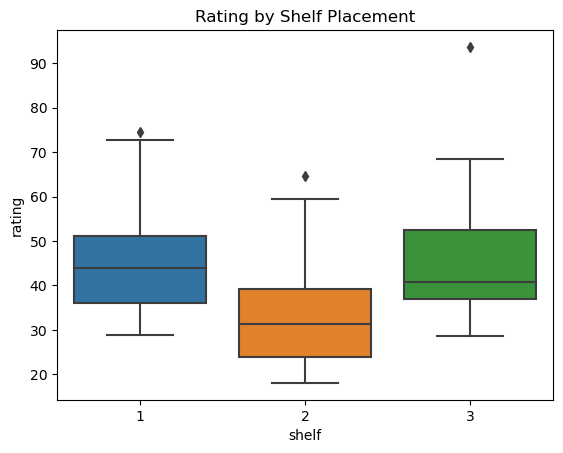

In [23]:
# Compare ratings across different shelves
sns.boxplot(x='shelf', y='rating', data=df)
plt.title('Rating by Shelf Placement')
plt.show()

In [30]:
# Calculate average ratings for each shelf
avg_ratings_by_shelf = df.groupby('shelf')['rating'].mean()

# Display average ratings by shelf
print("Average Ratings by Shelf:")
print(avg_ratings_by_shelf)


Average Ratings by Shelf:
shelf
1    46.145439
2    34.972827
3    45.220032
Name: rating, dtype: float64


#### CEREAL TYPE COMPARISON

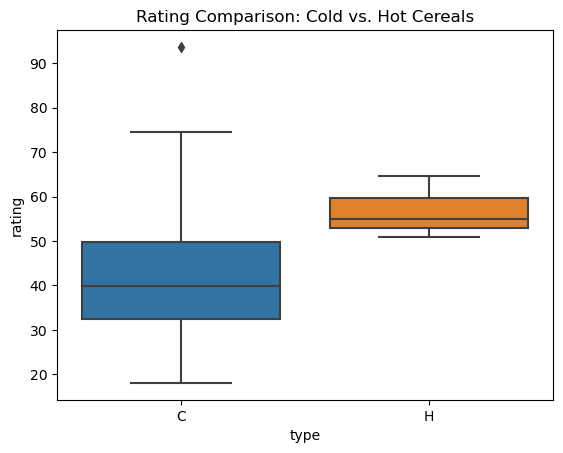

In [24]:
# Compare ratings for cold and hot cereals
sns.boxplot(x='type', y='rating', data=df)
plt.title('Rating Comparison: Cold vs. Hot Cereals')
plt.show()


In [27]:
# Calculate average ratings for each cereal type
avg_ratings_by_type = df.groupby('type')['rating'].mean()

# Display the cereal type with the highest average rating
top_cereal_type = avg_ratings_by_type.idxmax()
print(f"The cereal type with the highest average rating is: {top_cereal_type}")

The cereal type with the highest average rating is: H


#### NUTRIENTS VS RATING

In [28]:
# Calculate correlation coefficients
correlation_with_rating = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'rating']].corr()['rating']

# Display the correlation coefficients
print("Correlation between nutrients and rating:")
print(correlation_with_rating)


Correlation between nutrients and rating:
calories   -0.689376
protein     0.470618
fat        -0.409284
sodium     -0.401295
fiber       0.584160
carbo       0.052055
sugars     -0.759675
potass      0.380165
rating      1.000000
Name: rating, dtype: float64


#### CALORIE IMPACT

In [31]:
# Calculate the correlation coefficient between calories and ratings
correlation_calories_rating = df['calories'].corr(df['rating'])

# Display the correlation coefficient
print(f"Correlation between calories and rating: {correlation_calories_rating}")


Correlation between calories and rating: -0.6893760311652588
